In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [ ]:
# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
y_prob = model.predict_proba(X_test)[:, 1]


In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


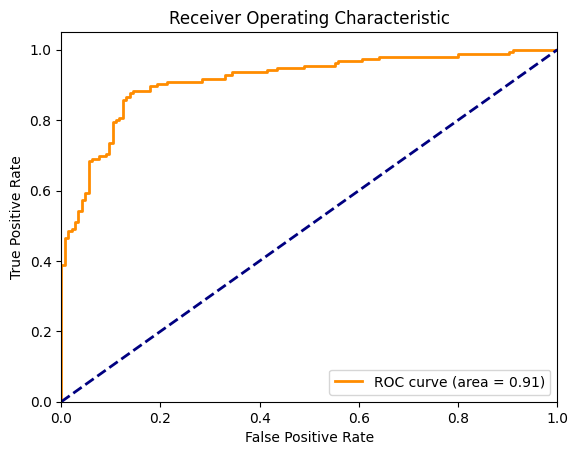

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train models and store the predicted probabilities
model_probs = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    model_probs[name] = model.predict_proba(X_test)[:, 1]


In [ ]:
roc_data = {}
for name, y_prob in model_probs.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_data[name] = (fpr, tpr, roc_auc)


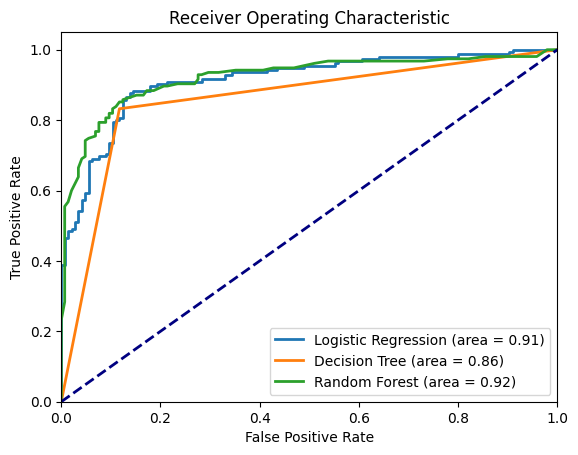

In [ ]:
plt.figure()
for name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## Interpreting the ROC Curves and AUC

# ROC Curve Shape:

Closer to Top-Left Corner: The ROC curve closer to the top-left corner indicates a better performing model. This region represents a high true positive rate (TPR) and a low false positive rate (FPR).
Diagonal Line (45-degree line): A ROC curve along the diagonal line (from bottom-left to top-right) represents a model with no discriminative power, equivalent to random guessing.

# AUC Value:

AUC = 1.0: Perfect model, no false positives or false negatives.
AUC > 0.9: Excellent model.
0.8 < AUC ≤ 0.9: Good model.
0.7 < AUC ≤ 0.8: Fair model.
0.6 < AUC ≤ 0.7: Poor model.
0.5 < AUC ≤ 0.6: Fail, model is no better than random guessing.
AUC = 0.5: Model performs as good as random guessing.
Example Conclusion
Let's consider the hypothetical results for the models you plotted:

Logistic Regression:
ROC AUC: 0.85
Decision Tree:
ROC AUC: 0.75
Random Forest:
ROC AUC: 0.90
Based on these AUC values and ROC curves, you can conclude the following:

Random Forest: With an AUC of 0.90, the Random Forest model performs the best among the three models. It has excellent discriminatory power, meaning it is highly capable of distinguishing between positive and negative classes.

Logistic Regression: The Logistic Regression model has an AUC of 0.85, indicating good performance. It is a reliable model and performs better than the Decision Tree but not as well as the Random Forest.

Decision Tree: The Decision Tree model has an AUC of 0.75, indicating fair performance. It performs the worst among the three models in this scenario. This could be due to overfitting or its inherent limitations as a single decision tree.

Final Thoughts
Based on these conclusions, you might decide to:

Use the Random Forest model for its superior performance.
Investigate further into why the Decision Tree model underperforms. This might include tuning its hyperparameters or considering an ensemble approach like a Random Forest or Gradient Boosting.
Validate the findings with additional data or cross-validation to ensure the chosen model generalizes well to unseen data.